# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report  
import lightgbm as lgb
import random
import optuna
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import umap
import umap.plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings         
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
file = pd.read_csv("ecg[1].csv", header = None)
file.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [4]:
file.shape

(4998, 141)

In [5]:
file.tail()

0         1         2         3         4         5         6    \
4993  0.608558 -0.335651 -0.990948 -1.784153 -2.626145 -2.957065 -2.931897   
4994 -2.060402 -2.860116 -3.405074 -3.748719 -3.513561 -3.006545 -2.234850   
4995 -1.122969 -2.252925 -2.867628 -3.358605 -3.167849 -2.638360 -1.664162   
4996 -0.547705 -1.889545 -2.839779 -3.457912 -3.929149 -3.966026 -3.492560   
4997 -1.351779 -2.209006 -2.520225 -3.061475 -3.065141 -3.030739 -2.622720   

           7         8         9    ...       131       132       133  \
4993 -2.664816 -2.090137 -1.461841  ...  1.757705  2.291923  2.704595   
4994 -1.593270 -1.075279 -0.976047  ...  1.388947  2.079675  2.433375   
4995 -0.935655 -0.866953 -0.645363  ... -0.472419 -1.310147 -2.029521   
4996 -2.695270 -1.849691 -1.374321  ...  1.258419  1.907530  2.280888   
4997 -2.044092 -1.295874 -0.733839  ... -1.512234 -2.076075 -2.586042   

           134       135       136       137       138       139  140  
4993  2.451519  2.017396  1.704358  1.688542  1.629593  1.342651  0.0  
4994  2.159484  1.819747  1.534767  1.696818  1.483832  1.047612  0.0  
4995 -3.221294 -4.176790 -4.009720 -2.874136 -2.008369 -1.808334  0.0  
4996  1.895242  1.437702  1.193433  1.261335  1.150449  0.804932  0.0  
4997 -3.322799 -3.627311 -3.437038 -2.260023 -1.577823 -0.684531  0.0  

[5 rows x 141 columns]

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

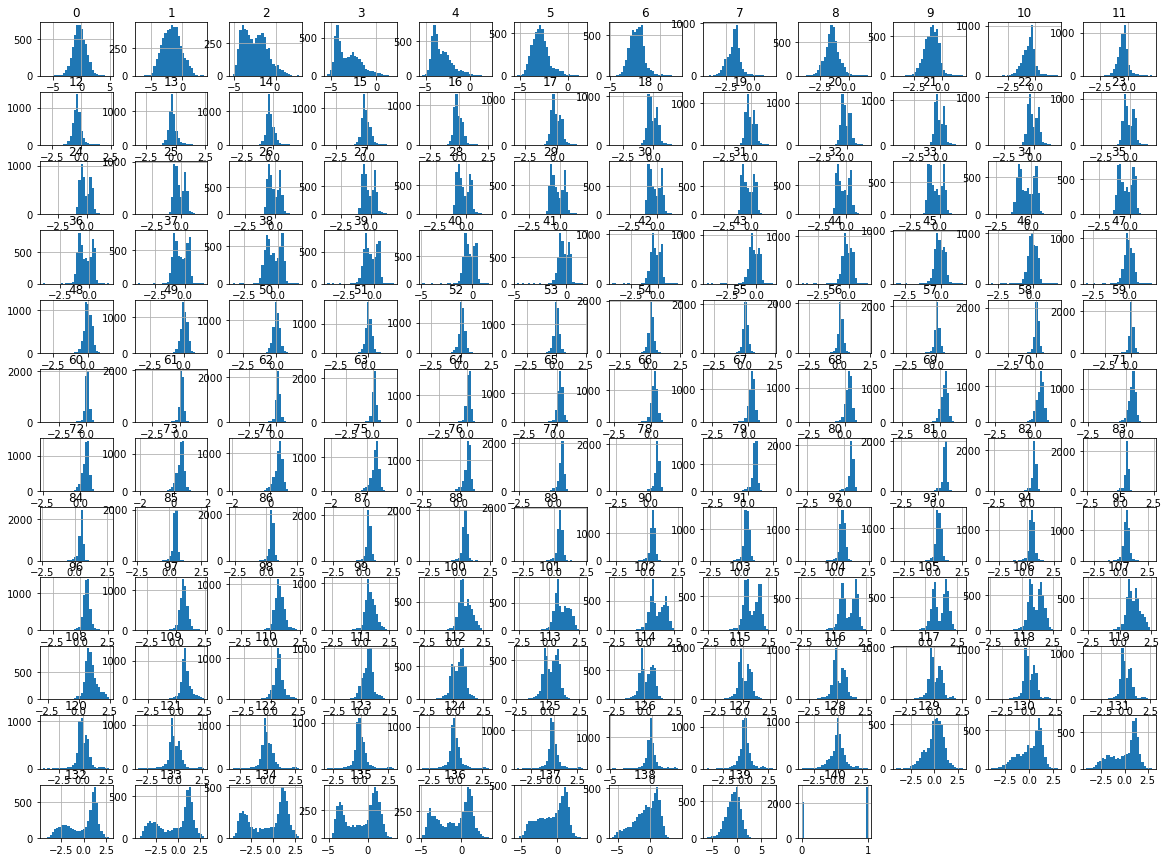

In [6]:
file.hist(bins=30,figsize=(20,15))

In [7]:
data = file.loc[:, 0:len(file.columns) - 2]  
labels = file.loc[:, len(file.columns) - 1]

# Time Series Analysis

In [8]:
signal = data.iloc[np.random.randint(0, len(data))].to_list()

# Plotting the time series

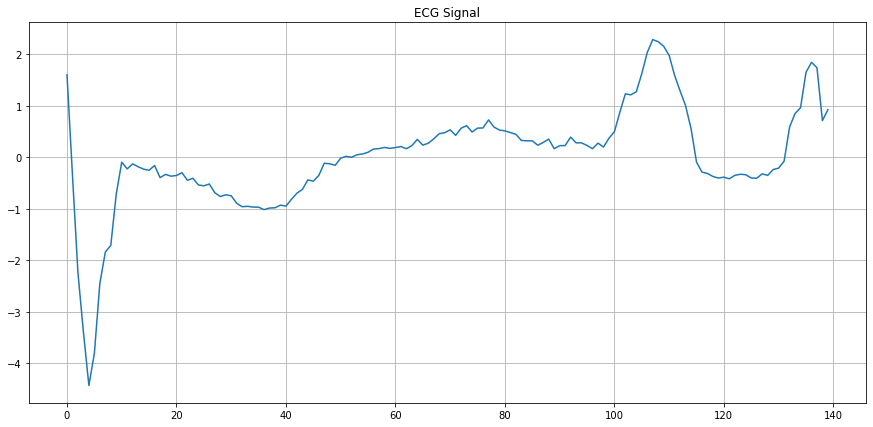

In [9]:
plt.figure(figsize = (15, 7))
plt.plot(signal)
plt.title('ECG Signal')
plt.grid(True)
plt.show()

# Plotting Moving Average

In [10]:
signal = pd.Series(signal)

In [11]:
def moving_average(series, n):
    "Calculate average of last n observations"
    return np.average(series[-n:])   

In [12]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

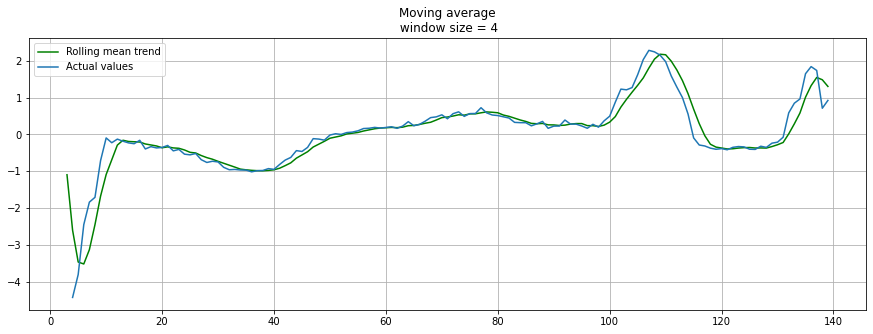

In [13]:
plotMovingAverage(signal, 4)

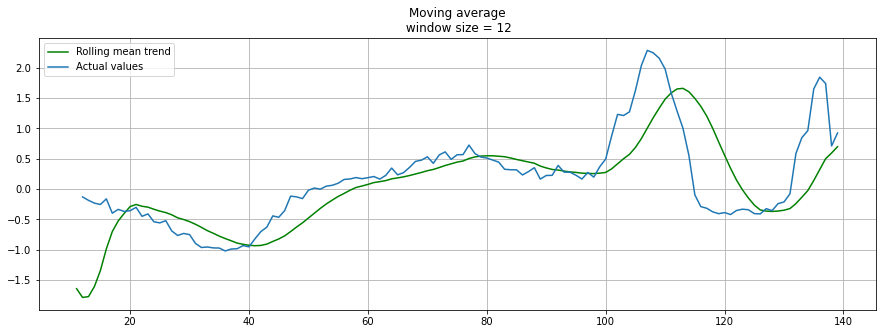

In [14]:
plotMovingAverage(signal, 12) # Smoothening

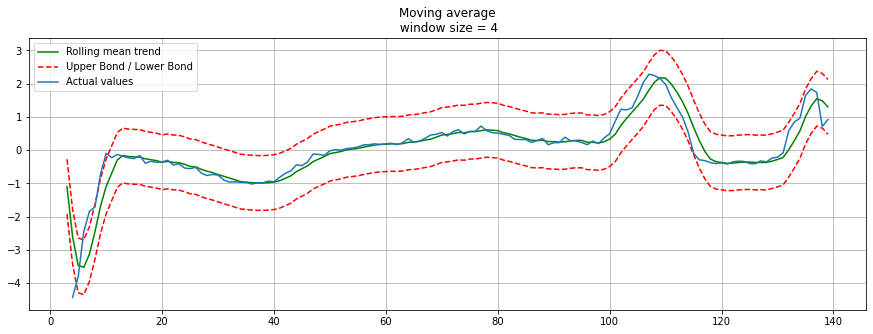

In [15]:
plotMovingAverage(signal, 4, plot_intervals=True)

# Plotting Weighted Average

In [16]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [17]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [18]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

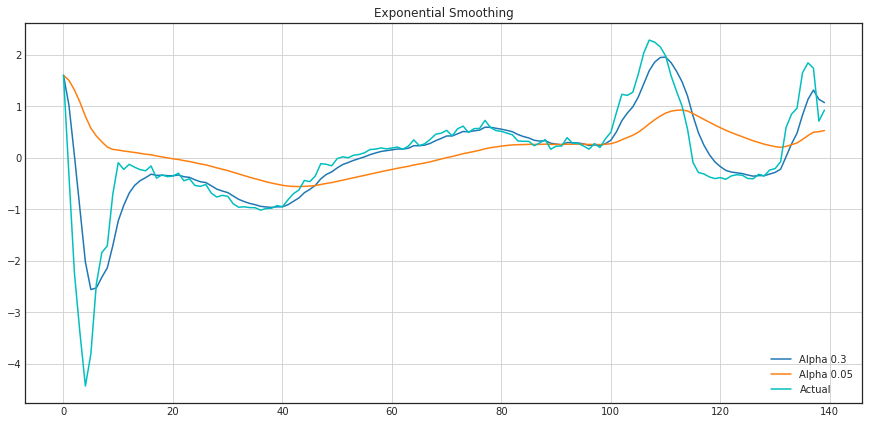

In [19]:
plotExponentialSmoothing(signal, [0.3, 0.05])

In [20]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

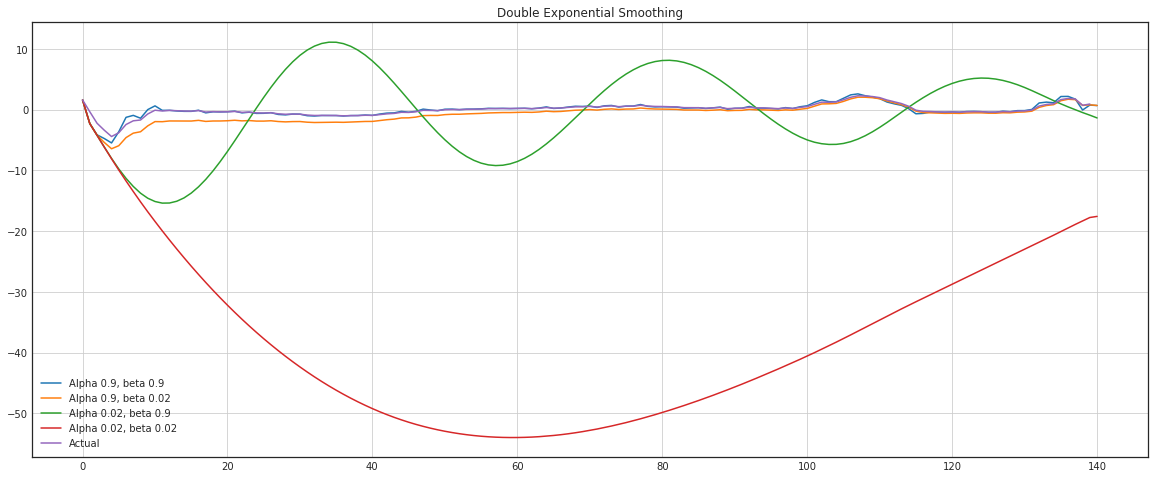

In [21]:
plotDoubleExponentialSmoothing(signal, alphas=[0.9, 0.02], betas=[0.9, 0.02])

# Histogram

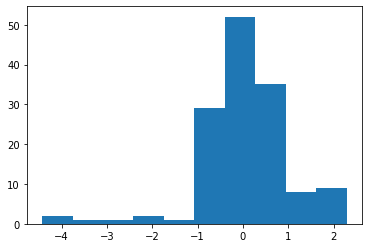

In [22]:
plt.hist(signal)
plt.show()

# Splitting Dataset

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, shuffle = True)

# Defining Model

# Logistic Regression

In [24]:
lor_model = LogisticRegression()
lor_model.fit(x_train, y_train)

lor_pred = lor_model.predict(x_test)

# SVM

In [25]:
svm_model = SVC(gamma = 'auto')
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

# Evaluation

# Classification Report

In [26]:
print(f"Classification Report of Logistic Regression: \n {classification_report(lor_pred,y_test)}")

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       519
         1.0       0.99      0.99      0.99       731

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [27]:
print(f"Classification Report of SVM: \n {classification_report(svm_pred,y_test)}")

Classification Report of SVM: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       522
         1.0       0.99      0.99      0.99       728

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



# Confusion Matrix

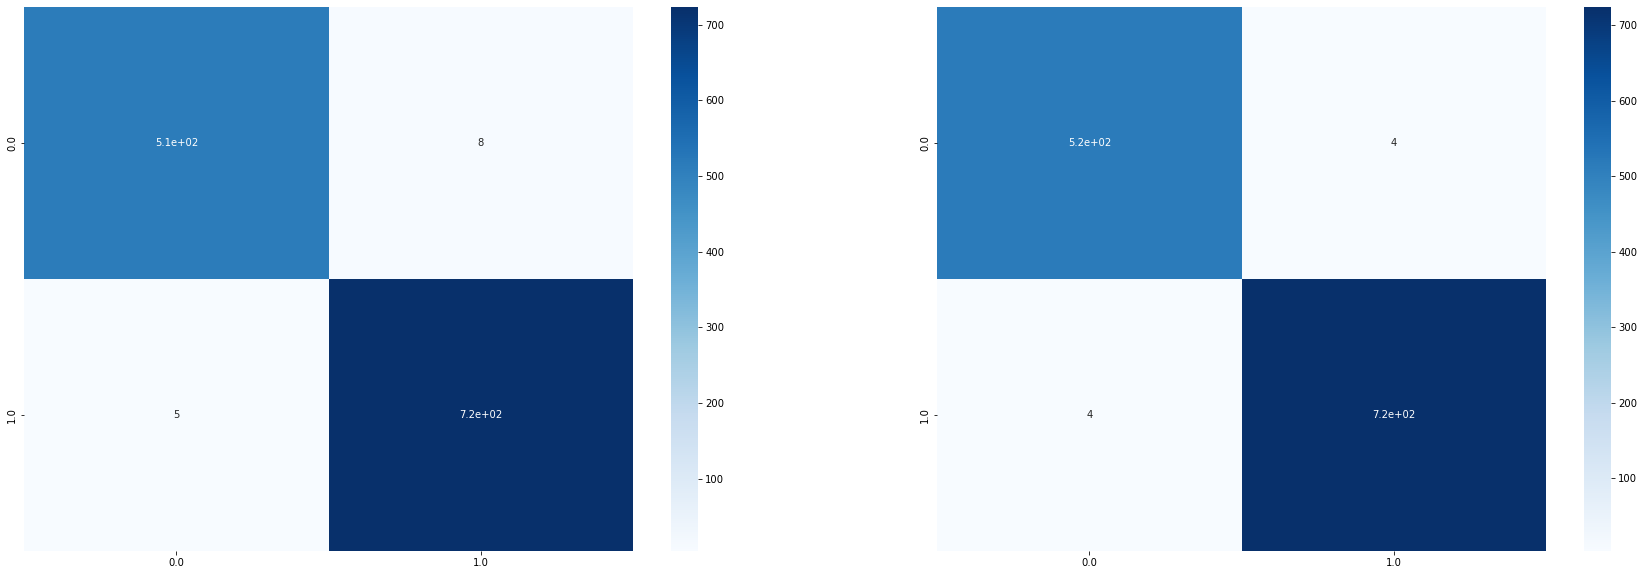

In [28]:
lor_cm = confusion_matrix(y_test, lor_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

class_names = np.unique(y_train)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.heatmap(lor_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)

plt.subplot(1,2,2)
sns.heatmap(svm_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)

plt.show()


# Metrics

In [29]:
r2_svm = r2_score(y_test, svm_pred)
r2_lor = r2_score(y_test, lor_pred)

mae_svm = mean_absolute_error(y_test, svm_pred)
mae_lor = mean_absolute_error(y_test, lor_pred)

mse_svm = mean_squared_error(y_test, svm_pred)
mse_lor = mean_squared_error(y_test, lor_pred)

msle_svm = mean_squared_log_error(y_test, svm_pred)
msle_lor = mean_squared_log_error(y_test, lor_pred)

In [30]:
metrics_dict = {"SVM" : [r2_svm, mae_svm, mse_svm, msle_svm], "Logistic Regression" : [r2_lor, mae_lor, mse_lor, msle_lor]}

In [31]:
metrics = pd.DataFrame(metrics_dict)
metrics

SVM  Logistic Regression
0  0.973685             0.957239
1  0.006400             0.010400
2  0.006400             0.010400
3  0.003075             0.004997

# ECG Abnormality Prediction LGBM

In [32]:
data.rename(index = {"file": "data",
                     "file":"data"},
                                 inplace = True)

In [33]:
data0=pd.read_csv('ecg[1].csv',header=None)
data0

0         1         2         3         4         5         6    \
0    -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1    -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2    -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3     0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4     0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   
...        ...       ...       ...       ...       ...       ...       ...   
4993  0.608558 -0.335651 -0.990948 -1.784153 -2.626145 -2.957065 -2.931897   
4994 -2.060402 -2.860116 -3.405074 -3.748719 -3.513561 -3.006545 -2.234850   
4995 -1.122969 -2.252925 -2.867628 -3.358605 -3.167849 -2.638360 -1.664162   
4996 -0.547705 -1.889545 -2.839779 -3.457912 -3.929149 -3.966026 -3.492560   
4997 -1.351779 -2.209006 -2.520225 -3.061475 -3.065141 -3.030739 -2.622720   

           7         8         9    ...       131       132       133  \
0    -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958   
1    -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490   
2    -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377   
3    -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345   
4    -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025   
...        ...       ...       ...  ...       ...       ...       ...   
4993 -2.664816 -2.090137 -1.461841  ...  1.757705  2.291923  2.704595   
4994 -1.593270 -1.075279 -0.976047  ...  1.388947  2.079675  2.433375   
4995 -0.935655 -0.866953 -0.645363  ... -0.472419 -1.310147 -2.029521   
4996 -2.695270 -1.849691 -1.374321  ...  1.258419  1.907530  2.280888   
4997 -2.044092 -1.295874 -0.733839  ... -1.512234 -2.076075 -2.586042   

           134       135       136       137       138       139  140  
0     0.578621  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1     0.724046  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2    -0.021919 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3     0.842069  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4     1.371682  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  
...        ...       ...       ...       ...       ...       ...  ...  
4993  2.451519  2.017396  1.704358  1.688542  1.629593  1.342651  0.0  
4994  2.159484  1.819747  1.534767  1.696818  1.483832  1.047612  0.0  
4995 -3.221294 -4.176790 -4.009720 -2.874136 -2.008369 -1.808334  0.0  
4996  1.895242  1.437702  1.193433  1.261335  1.150449  0.804932  0.0  
4997 -3.322799 -3.627311 -3.437038 -2.260023 -1.577823 -0.684531  0.0  

[4998 rows x 141 columns]

In [34]:
m=len(data0)
print(m)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

4998


In [35]:
dataY = data0[140]
dataX = data0.drop(140,axis=1)

In [36]:
trainX=dataX.iloc[M[0:(m//4)*3]].reset_index(drop=True)
trainY=dataY.iloc[M[0:(m//4)*3]].reset_index(drop=True)
testX=dataX.iloc[M[(m//4)*3:]].reset_index(drop=True)
testY=dataY.iloc[M[(m//4)*3:]].reset_index(drop=True)

In [37]:
trainY

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3742    0.0
3743    1.0
3744    1.0
3745    0.0
3746    1.0
Name: 140, Length: 3747, dtype: float64

In [38]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=list(range(140)),y=trainX.iloc[0,:],name='Normal (label=0)'),secondary_y=False,)
fig.add_trace(go.Scatter(x=list(range(140)),y=trainX.iloc[2,:],name='Abnormal (label=1)'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="ECG sample")
fig.update_xaxes(title_text="time")
fig.update_yaxes(title_text="ECG",secondary_y=False)
fig.show()

In [39]:
columns=trainX.columns.to_list()
print(columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]


In [40]:
def objective(trial,data=trainX,target=trainY):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param =   {
        'num_leaves': trial.suggest_int('num_leaves', 2, 200),
        'objective': trial.suggest_categorical('objective',['regression','rmse']),  
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-1, 1.0),
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1e-3),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 2, 10),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "verbosity": -1,
    }
    model = lgb.LGBMClassifier(**param)      
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    preds = model.predict(test_x)
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [41]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=16)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-10 00:38:32,639] A new study created in memory with name: no-name-7247998f-01cf-4f6c-86b8-6ce9fb5c4eea


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9960200708846306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9960200708846306
[LightGBM] [Warning] lambda_l1 is set=2.1515850892147535e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1515850892147535e-07
[LightGBM] [Warning] bagging_fraction is set=0.9810700965978042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9810700965978042
[LightGBM] [Warning] lambda_l2 is set=1.6837338985152497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6837338985152497
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-04-10 00:38:33,077] Trial 0 finished with value: 0.12110601416389967 and parameters: {'num_leaves': 107, 'objective': 'rmse', 'max_depth': 6, 'learning_rate': 0.3651330537046081, 'lambda_l1': 2.1515850892147535e-07, 'lambda_l2': 1.6837338985152497, 'bagging_freq': 7, 'bagging_fraction': 0.9810700965978042, 'feature_fraction': 0.9960200708846306}. Best is trial 0 with value: 0.12110601416389967.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5444639283824017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5444639283824017
[LightGBM] [Warning] lambda_l1 is set=1.5469978962071247e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5469978962071247e-07
[LightGBM] [Warning] bagging_fraction is set=0.25160854320060183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25160854320060183
[LightGBM] [Warning] lambda_l2 is set=0.6874800311914607, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6874800311914607
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-04-10 00:38:33,358] Trial 1 finished with value: 0.13165611772087665 and parameters: {'num_leaves': 140, 'objective': 'rmse', 'max_depth': 9, 'learning_rate': 0.552491540665315, 'lambda_l1': 1.5469978962071247e-07, 'lambda_l2': 0.6874800311914607, 'bagging_freq': 6, 'bagging_fraction': 0.25160854320060183, 'feature_fraction': 0.5444639283824017}. Best is trial 0 with value: 0.12110601416389967.
[I 2023-04-10 00:38:33,546] Trial 2 finished with value: 0.10327955589886445 and parameters: {'num_leaves': 36, 'objective': 'regression', 'max_depth': 5, 'learning_rate': 0.5638021729238405, 'lambda_l1': 6.272413830445654e-05, 'lambda_l2': 0.014633882279212182, 'bagging_freq': 3, 'bagging_fraction': 0.8386711652885595, 'feature_fraction': 0.6828457412446374}. Best is trial 2 with value: 0.10327955589886445.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6828457412446374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828457412446374
[LightGBM] [Warning] lambda_l1 is set=6.272413830445654e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.272413830445654e-05
[LightGBM] [Warning] bagging_fraction is set=0.8386711652885595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8386711652885595
[LightGBM] [Warning] lambda_l2 is set=0.014633882279212182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014633882279212182
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.994614091132297, colsample_bytree=1.0 will be ignor

[I 2023-04-10 00:38:34,140] Trial 3 finished with value: 0.10954451150103323 and parameters: {'num_leaves': 170, 'objective': 'regression', 'max_depth': 10, 'learning_rate': 0.3779244647743362, 'lambda_l1': 5.017248962060729e-06, 'lambda_l2': 0.2797702000433339, 'bagging_freq': 6, 'bagging_fraction': 0.6639011400592626, 'feature_fraction': 0.994614091132297}. Best is trial 2 with value: 0.10327955589886445.
[I 2023-04-10 00:38:34,296] Trial 4 finished with value: 0.12110601416389967 and parameters: {'num_leaves': 129, 'objective': 'regression', 'max_depth': 4, 'learning_rate': 0.32229275857042083, 'lambda_l1': 1.1570432697974697e-06, 'lambda_l2': 0.21327538932883233, 'bagging_freq': 4, 'bagging_fraction': 0.5436983629372728, 'feature_fraction': 0.9046206675762754}. Best is trial 2 with value: 0.10327955589886445.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9046206675762754, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9046206675762754
[LightGBM] [Warning] lambda_l1 is set=1.1570432697974697e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1570432697974697e-06
[LightGBM] [Warning] bagging_fraction is set=0.5436983629372728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5436983629372728
[LightGBM] [Warning] lambda_l2 is set=0.21327538932883233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21327538932883233
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6570020431152741, colsample_bytree=1.0 will be igno

[I 2023-04-10 00:38:34,750] Trial 5 finished with value: 0.12110601416389967 and parameters: {'num_leaves': 52, 'objective': 'regression', 'max_depth': 10, 'learning_rate': 0.8159796583144132, 'lambda_l1': 8.945444602109102e-07, 'lambda_l2': 0.3220128519784732, 'bagging_freq': 9, 'bagging_fraction': 0.8893162416239726, 'feature_fraction': 0.6570020431152741}. Best is trial 2 with value: 0.10327955589886445.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7294755935303158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7294755935303158
[LightGBM] [Warning] lambda_l1 is set=6.850169796546232e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.850169796546232e-06
[LightGBM] [Warning] bagging_fraction is set=0.9422435007723724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9422435007723724
[LightGBM] [Warning] lambda_l2 is set=0.1460869215780498, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1460869215780498
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-04-10 00:38:35,078] Trial 6 finished with value: 0.08164965809277261 and parameters: {'num_leaves': 176, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.3050471883457857, 'lambda_l1': 6.850169796546232e-06, 'lambda_l2': 0.1460869215780498, 'bagging_freq': 2, 'bagging_fraction': 0.9422435007723724, 'feature_fraction': 0.7294755935303158}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.44902316926545655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44902316926545655
[LightGBM] [Warning] lambda_l1 is set=4.9457715864206206e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9457715864206206e-08
[LightGBM] [Warning] bagging_fraction is set=0.6665665933867801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6665665933867801
[LightGBM] [Warning] lambda_l2 is set=0.001480953168918187, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001480953168918187
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-04-10 00:38:35,375] Trial 7 finished with value: 0.10954451150103323 and parameters: {'num_leaves': 191, 'objective': 'rmse', 'max_depth': 10, 'learning_rate': 0.3812905543711409, 'lambda_l1': 4.9457715864206206e-08, 'lambda_l2': 0.001480953168918187, 'bagging_freq': 10, 'bagging_fraction': 0.6665665933867801, 'feature_fraction': 0.44902316926545655}. Best is trial 6 with value: 0.08164965809277261.
[I 2023-04-10 00:38:35,500] Trial 8 finished with value: 0.1505545305418162 and parameters: {'num_leaves': 164, 'objective': 'regression', 'max_depth': 5, 'learning_rate': 0.6040146107994304, 'lambda_l1': 2.368918008053395e-08, 'lambda_l2': 0.002604399713548585, 'bagging_freq': 8, 'bagging_fraction': 0.31666362212361326, 'feature_fraction': 0.4196379003327042}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4196379003327042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4196379003327042
[LightGBM] [Warning] lambda_l1 is set=2.368918008053395e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.368918008053395e-08
[LightGBM] [Warning] bagging_fraction is set=0.31666362212361326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.31666362212361326
[LightGBM] [Warning] lambda_l2 is set=0.002604399713548585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002604399713548585
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7183795322297459, colsample_bytree=1.0 will be ig

[I 2023-04-10 00:38:35,719] Trial 9 finished with value: 0.11547005383792516 and parameters: {'num_leaves': 134, 'objective': 'regression', 'max_depth': 6, 'learning_rate': 0.38592244382687335, 'lambda_l1': 2.5793019810698816e-05, 'lambda_l2': 2.858174691106191, 'bagging_freq': 5, 'bagging_fraction': 0.6845459321289808, 'feature_fraction': 0.7183795322297459}. Best is trial 6 with value: 0.08164965809277261.
[I 2023-04-10 00:38:35,875] Trial 10 finished with value: 0.09660917830792959 and parameters: {'num_leaves': 70, 'objective': 'rmse', 'max_depth': 2, 'learning_rate': 0.164420449908886, 'lambda_l1': 0.0005329211071204125, 'lambda_l2': 7.761676297817606, 'bagging_freq': 2, 'bagging_fraction': 0.9888419642410972, 'feature_fraction': 0.8075311807357517}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8075311807357517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075311807357517
[LightGBM] [Warning] lambda_l1 is set=0.0005329211071204125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005329211071204125
[LightGBM] [Warning] bagging_fraction is set=0.9888419642410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9888419642410972
[LightGBM] [Warning] lambda_l2 is set=7.761676297817606, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.761676297817606
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8348701141955515, colsample_bytree=1.0 will be ignored. C

[I 2023-04-10 00:38:36,032] Trial 11 finished with value: 0.09660917830792959 and parameters: {'num_leaves': 65, 'objective': 'rmse', 'max_depth': 2, 'learning_rate': 0.1592909035570836, 'lambda_l1': 0.0008984437819285534, 'lambda_l2': 9.3919419487172, 'bagging_freq': 2, 'bagging_fraction': 0.9980925001543257, 'feature_fraction': 0.8348701141955515}. Best is trial 6 with value: 0.08164965809277261.
[I 2023-04-10 00:38:36,203] Trial 12 finished with value: 0.12649110640673517 and parameters: {'num_leaves': 4, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.17795082195185555, 'lambda_l1': 0.0007392317628666736, 'lambda_l2': 0.033204291537370374, 'bagging_freq': 2, 'bagging_fraction': 0.8504568686691638, 'feature_fraction': 0.7901019161623204}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7901019161623204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7901019161623204
[LightGBM] [Warning] lambda_l1 is set=0.0007392317628666736, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007392317628666736
[LightGBM] [Warning] bagging_fraction is set=0.8504568686691638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8504568686691638
[LightGBM] [Warning] lambda_l2 is set=0.033204291537370374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.033204291537370374
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.774357925603873, colsample_bytree=1.0 will be ignor

[I 2023-04-10 00:38:36,360] Trial 13 finished with value: 0.09660917830792959 and parameters: {'num_leaves': 85, 'objective': 'rmse', 'max_depth': 2, 'learning_rate': 0.11660656422925221, 'lambda_l1': 7.440117222918428e-05, 'lambda_l2': 9.325195201179774, 'bagging_freq': 4, 'bagging_fraction': 0.976096294826561, 'feature_fraction': 0.774357925603873}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6101034225592155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6101034225592155
[LightGBM] [Warning] lambda_l1 is set=9.239739948191445e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.239739948191445e-06
[LightGBM] [Warning] bagging_fraction is set=0.8050994255376005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050994255376005
[LightGBM] [Warning] lambda_l2 is set=0.07405545808952847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07405545808952847
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-04-10 00:38:36,641] Trial 14 finished with value: 0.10954451150103323 and parameters: {'num_leaves': 106, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.23352434237308747, 'lambda_l1': 9.239739948191445e-06, 'lambda_l2': 0.07405545808952847, 'bagging_freq': 2, 'bagging_fraction': 0.8050994255376005, 'feature_fraction': 0.6101034225592155}. Best is trial 6 with value: 0.08164965809277261.
[I 2023-04-10 00:38:36,891] Trial 15 finished with value: 0.12649110640673517 and parameters: {'num_leaves': 81, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.23563038572487183, 'lambda_l1': 7.234084715707422e-05, 'lambda_l2': 1.2556318345528084, 'bagging_freq': 4, 'bagging_fraction': 0.11742156927297553, 'feature_fraction': 0.853858241794658}. Best is trial 6 with value: 0.08164965809277261.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.853858241794658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.853858241794658
[LightGBM] [Warning] lambda_l1 is set=7.234084715707422e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.234084715707422e-05
[LightGBM] [Warning] bagging_fraction is set=0.11742156927297553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.11742156927297553
[LightGBM] [Warning] lambda_l2 is set=1.2556318345528084, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2556318345528084
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
Number of finished trials: 16
Best trial: {'num_leaves': 176, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.3050471883457857, 'lambda_l1': 6.850169796546232e-06, 'lambda_l2': 0.1460869215780498, 'bagg

In [42]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  0.121106 2023-04-10 00:38:32.639392 2023-04-10 00:38:33.077584   
1        1  0.131656 2023-04-10 00:38:33.077584 2023-04-10 00:38:33.358835   
2        2  0.103280 2023-04-10 00:38:33.358835 2023-04-10 00:38:33.546335   
3        3  0.109545 2023-04-10 00:38:33.546335 2023-04-10 00:38:34.140257   
4        4  0.121106 2023-04-10 00:38:34.140257 2023-04-10 00:38:34.296506   
5        5  0.121106 2023-04-10 00:38:34.296506 2023-04-10 00:38:34.750246   
6        6  0.081650 2023-04-10 00:38:34.750246 2023-04-10 00:38:35.078372   
7        7  0.109545 2023-04-10 00:38:35.078372 2023-04-10 00:38:35.375246   
8        8  0.150555 2023-04-10 00:38:35.375246 2023-04-10 00:38:35.500248   
9        9  0.115470 2023-04-10 00:38:35.500248 2023-04-10 00:38:35.719000   
10      10  0.096609 2023-04-10 00:38:35.734620 2023-04-10 00:38:35.875830   
11      11  0.096609 2023-04-10 00:38:35.875830 2023-04-10 00:38:36.032079   
12      12  0.126491 2023-04-10 00:38:36.047705 2023-04-10 00:38:36.203954   
13      13  0.096609 2023-04-10 00:38:36.203954 2023-04-10 00:38:36.360205   
14      14  0.109545 2023-04-10 00:38:36.360205 2023-04-10 00:38:36.641455   
15      15  0.126491 2023-04-10 00:38:36.641455 2023-04-10 00:38:36.891455   

                 duration  params_bagging_fraction  params_bagging_freq  \
0  0 days 00:00:00.438192                 0.981070                    7   
1  0 days 00:00:00.281251                 0.251609                    6   
2  0 days 00:00:00.187500                 0.838671                    3   
3  0 days 00:00:00.593922                 0.663901                    6   
4  0 days 00:00:00.156249                 0.543698                    4   
5  0 days 00:00:00.453740                 0.889316                    9   
6  0 days 00:00:00.328126                 0.942244                    2   
7  0 days 00:00:00.296874                 0.666567                   10   
8  0 days 00:00:00.125002                 0.316664                    8   
9  0 days 00:00:00.218752                 0.684546                    5   
10 0 days 00:00:00.141210                 0.988842                    2   
11 0 days 00:00:00.156249                 0.998093                    2   
12 0 days 00:00:00.156249                 0.850457                    2   
13 0 days 00:00:00.156251                 0.976096                    4   
14 0 days 00:00:00.281250                 0.805099                    2   
15 0 days 00:00:00.250000                 0.117422                    4   

    params_feature_fraction  params_lambda_l1  params_lambda_l2  \
0                  0.996020      2.151585e-07          1.683734   
1                  0.544464      1.546998e-07          0.687480   
2                  0.682846      6.272414e-05          0.014634   
3                  0.994614      5.017249e-06          0.279770   
4                  0.904621      1.157043e-06          0.213275   
5                  0.657002      8.945445e-07          0.322013   
6                  0.729476      6.850170e-06          0.146087   
7                  0.449023      4.945772e-08          0.001481   
8                  0.419638      2.368918e-08          0.002604   
9                  0.718380      2.579302e-05          2.858175   
10                 0.807531      5.329211e-04          7.761676   
11                 0.834870      8.984438e-04          9.391942   
12                 0.790102      7.392318e-04          0.033204   
13                 0.774358      7.440117e-05          9.325195   
14                 0.610103      9.239740e-06          0.074055   
15                 0.853858      7.234085e-05          1.255632   

    params_learning_rate  params_max_depth  params_num_leaves  \
0               0.365133                 6                107   
1               0.552492                 9                140   
2               0.563802                 5                 36   
3

In [43]:
# shows the scores from all trials
optuna.visualization.plot_optimization_history(study)

In [44]:
# interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [45]:
# shows the evolution of the search
optuna.visualization.plot_slice(study)

In [46]:
# parameter interactions on an interactive chart.
optuna.visualization.plot_contour(study, params=['num_leaves','learning_rate','bagging_freq'])

In [47]:
# Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [48]:
# Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [49]:
Best_trial=study.best_trial.params
print(Best_trial)

{'num_leaves': 176, 'objective': 'rmse', 'max_depth': 8, 'learning_rate': 0.3050471883457857, 'lambda_l1': 6.850169796546232e-06, 'lambda_l2': 0.1460869215780498, 'bagging_freq': 2, 'bagging_fraction': 0.9422435007723724, 'feature_fraction': 0.7294755935303158}


In [50]:
preds = np.zeros((len(testX)))
kf = KFold(n_splits=5,random_state=48,shuffle=True)
for trn_idx, test_idx in kf.split(trainX[columns],trainY):
    X_tr,X_val=trainX[columns].iloc[trn_idx],trainX[columns].iloc[test_idx]
    y_tr,y_val=trainY.iloc[trn_idx],trainY.iloc[test_idx]
    model = lgb.LGBMClassifier(**Best_trial)
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
    preds+=model.predict(testX[columns])/kf.n_splits   ###### predict_proba
    rmse=mean_squared_error(y_val, model.predict(X_val),squared=False)
    print(rmse)

[LightGBM] [Warning] feature_fraction is set=0.7294755935303158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7294755935303158
[LightGBM] [Warning] lambda_l1 is set=6.850169796546232e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.850169796546232e-06
[LightGBM] [Warning] bagging_fraction is set=0.9422435007723724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9422435007723724
[LightGBM] [Warning] lambda_l2 is set=0.1460869215780498, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1460869215780498
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
0.12110601416389967
[LightGBM] [Warning] feature_fraction is set=0.7294755935303158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7294755935303158
[LightGBM] [Warning] lambda_l1 is set=6.850169796546232e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.850169796546232e-06
[Ligh

In [51]:
model

LGBMClassifier(bagging_fraction=0.9422435007723724, bagging_freq=2,
               feature_fraction=0.7294755935303158,
               lambda_l1=6.850169796546232e-06, lambda_l2=0.1460869215780498,
               learning_rate=0.3050471883457857, max_depth=8, num_leaves=176,
               objective='rmse')

In [52]:
y=testY.astype(int).tolist()
y_pred=pd.Series(preds).apply(lambda x:np.where(x>0.5,1,0)).tolist()
print(y[0:10])
print(y_pred[0:10])

[1, 0, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 1, 0]


In [53]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y,y_pred)
print(accuracy)

0.9896083133493205


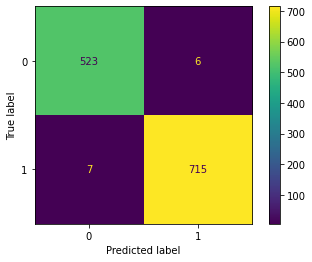

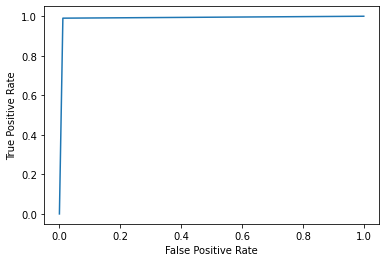

In [54]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

cm = confusion_matrix(y, preds>0.5)
cm_display = ConfusionMatrixDisplay(cm).plot()

fpr, tpr, _ = roc_curve(y, preds>0.5)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# DL Auto-encoders

In [55]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# Doing Simple EDA

In [56]:
dataframe = pd.read_csv('ecg[1].csv', header=None)
raw_data = dataframe.values
dataframe.head().style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

# Checking Target Imblance

In [57]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Abnormal']
values = dataframe[140].value_counts()/dataframe[140].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="ECG dataset",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

# Splitting Dataset

In [58]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Preprocessing

In [59]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [60]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

print("the length of train :",len(train_labels))
print("the length of test :",len(test_labels))

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

the length of train : 3998
the length of test : 1000


# Plot the normal ECG

Text(0.5, 1.0, 'A Normal ECG')

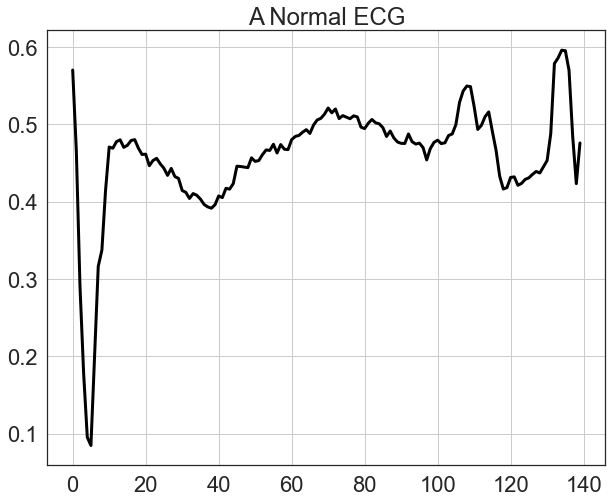

In [61]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.grid()
plt.plot(np.arange(140), normal_train_data[0],color='black',linewidth=3.0)
plt.title("A Normal ECG")

# Plot the abnormal ECG.

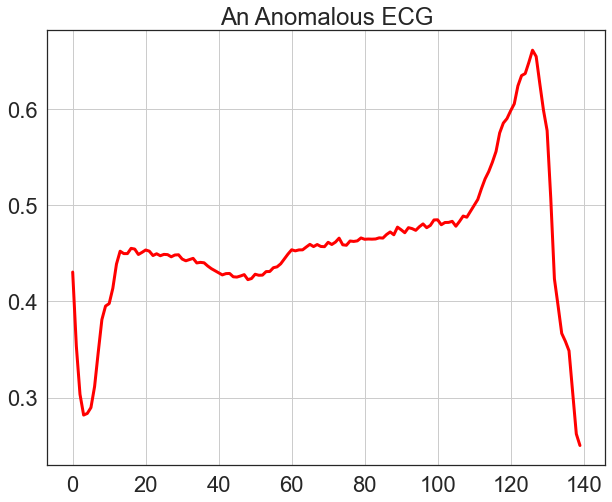

In [62]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0],color='red',linewidth=3.0)
plt.title("An Anomalous ECG")
plt.show()

# Modeling

In [63]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [64]:
autoencoder.compile(optimizer='adam', loss='mae')

# Training
The autoencoder is trained using only regular ECGs, but evaluated using the full test set.

In [65]:
normal_train_data.shape, normal_train_data.shape

(TensorShape([2359, 140]), TensorShape([2359, 140]))

In [66]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 43ms/step - loss: 0.0575 - val_loss: 0.0527
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0548 - val_loss: 0.0506
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0507 - val_loss: 0.0491
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0468 - val_loss: 0.0471
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0430 - val_loss: 0.0445
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0395 - val_loss: 0.0431
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0363 - val_loss: 0.0415
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0335 - val_loss: 0.0401
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0314 - val_loss: 0.0394
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0297 - val_loss: 0.0383
Epoch 11/20
5/5 [============

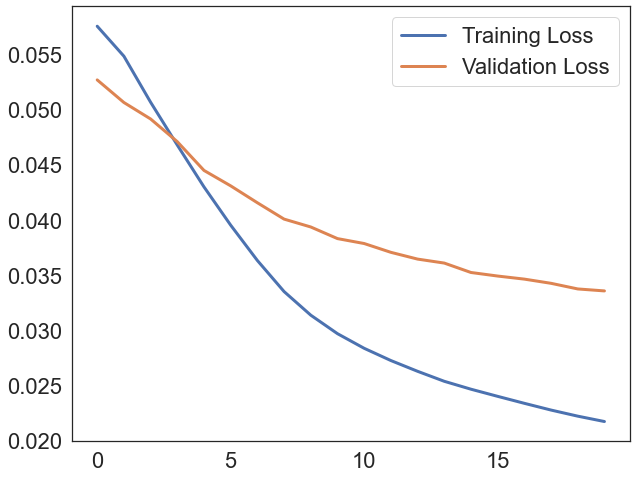

In [67]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

# Testing using normal data

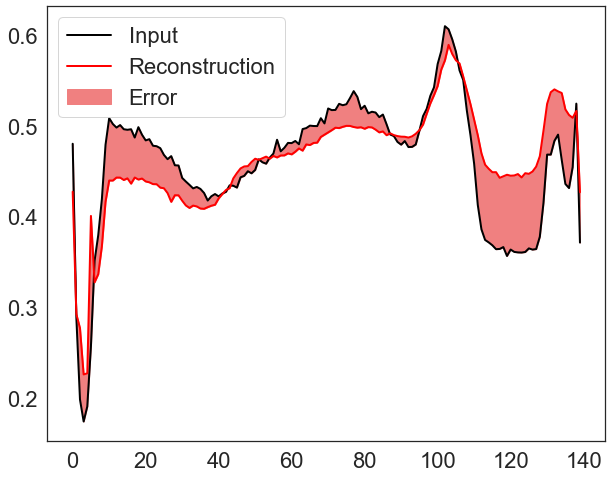

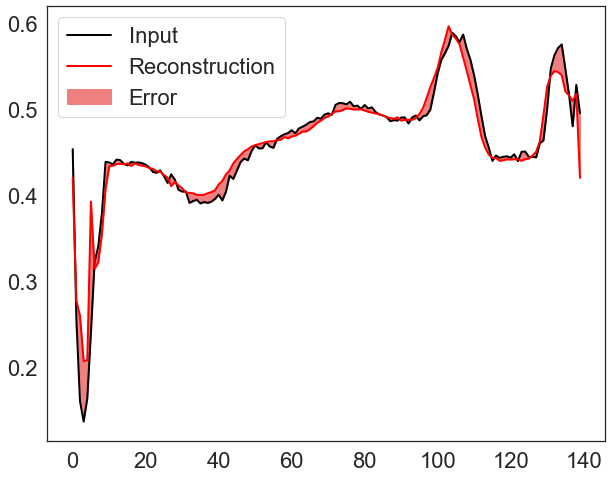

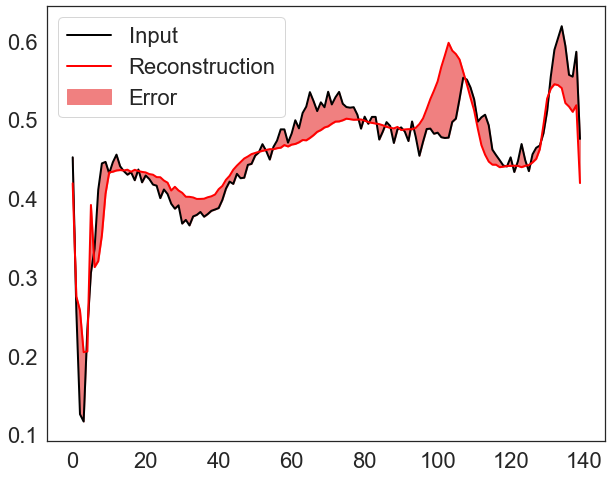

In [68]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(normal_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'red',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], normal_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()


In [69]:
encoded_imgs_normal = pd.DataFrame(encoded_imgs)
encoded_imgs_normal['label'] = 1

# Testing using abnormal data

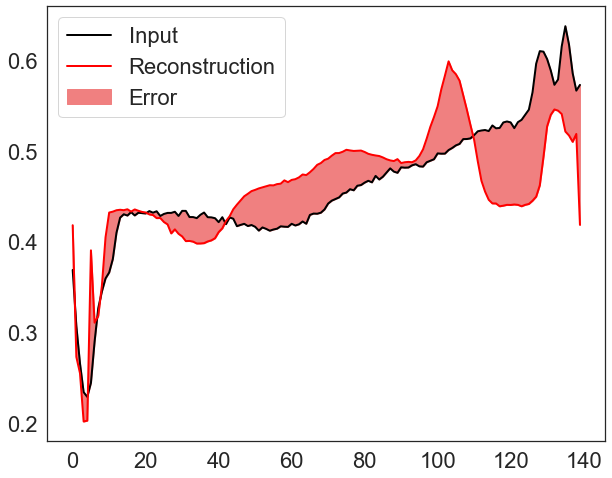

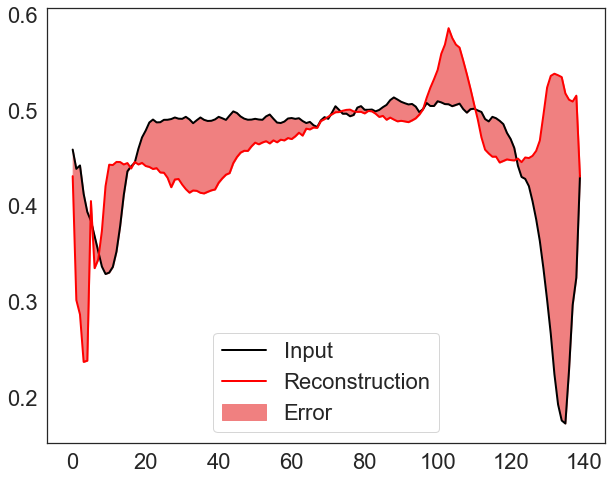

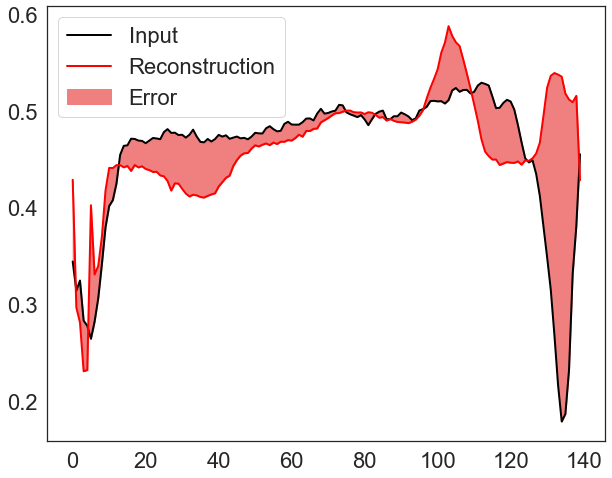

In [70]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(anomalous_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'red',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], anomalous_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

# Detecting Anomaly
Anomalies are detected by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, we compute the mean error for normal examples in the training set, and then classify future examples as abnormal if the reconstruction error is greater than the standard deviation of the training set.

Plot the reconstruction error for normal ECGs in the training set.

In [71]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

74/74 [==============================] - 0s 1ms/step


In [72]:
np.mean(train_loss)


0.021446822

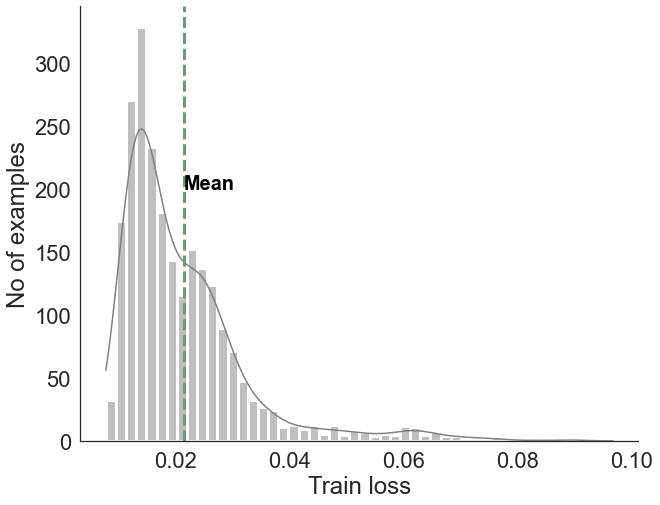

In [73]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Mean", horizontalalignment='left', 
         size='small', color='black', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

In [74]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033235878


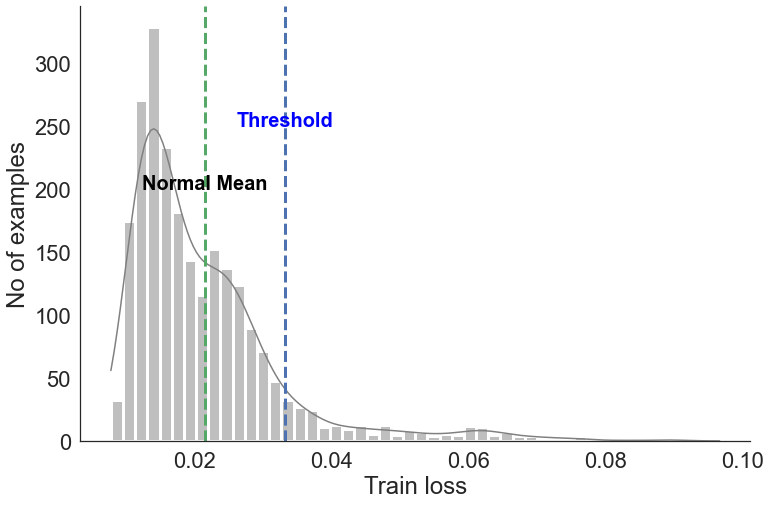

In [75]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', 
         size='small', color='Blue', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

In [76]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

14/14 [==============================] - 0s 1ms/step


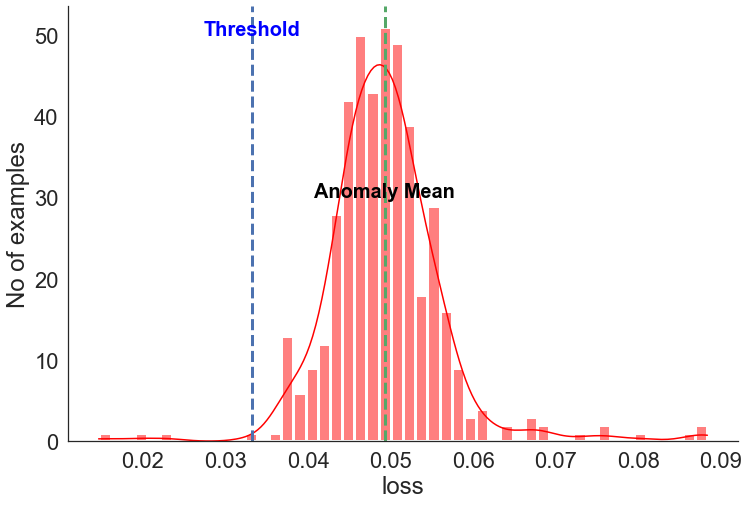

In [77]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 30, "Anomaly Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.text(threshold, 50, "Threshold", horizontalalignment='center', 
         size='small', color='Blue', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()


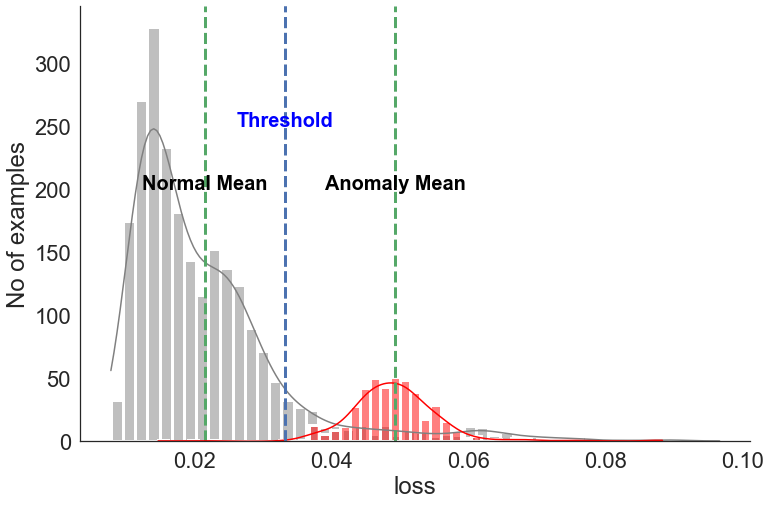

In [78]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', 
         size='small', color='Blue', weight='semibold')

sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center', 
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

# Predicting

In [79]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [80]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.942
Precision = 0.9921568627450981
Recall = 0.9035714285714286


In [81]:
#confusion_matrix = get_clf_eval(test_labels,preds,preds)
#plt.figure(figsize=(8,6))
#sns.set(font_scale = 2)
#sns.set_style("white")
#sns.heatmap(confusion_matrix, cmap = 'gist_yarg_r',annot = True, fmt='d')

# ECG Anomaly Detection using Autoencoders

In [82]:
df = pd.read_csv('ecg[1].csv', header=None)
df.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [83]:
#Now we will separate the data and labels so that it will be easy for us
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [84]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

# Lets normalize the data to the range [0-1]

We will use the simple formula :-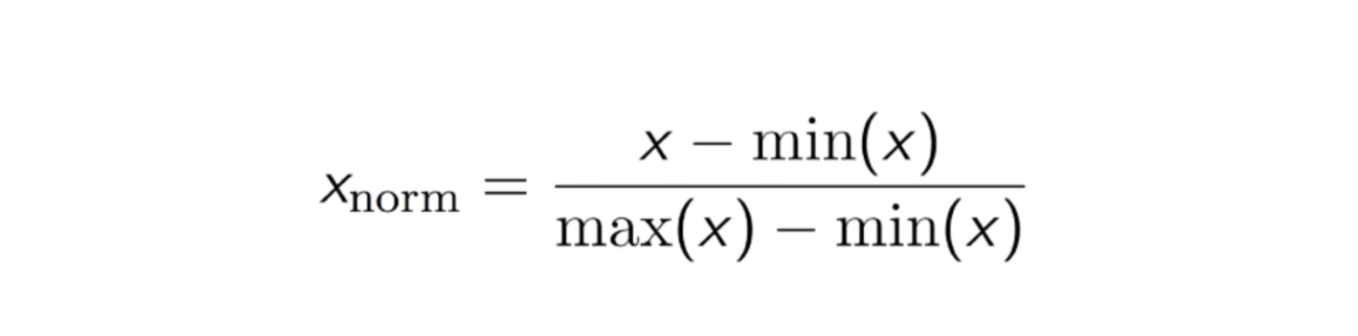

In [85]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [86]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


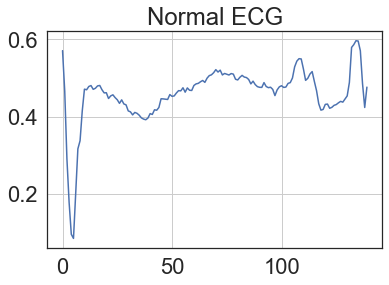

In [87]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

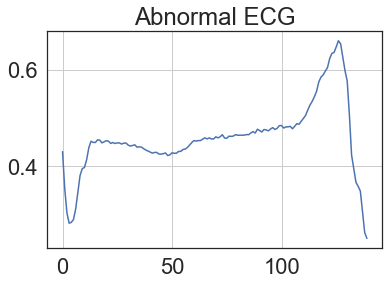

In [88]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# This model uses an Autoencoder architecture for anomaly detection

Autoencoders are a specific type of feedforward neural network.It compresess the input into a so-called "code" of lower dimensionality and then tries to reconstruct the output from this code.It is an unsupervised learning model.

It consists of two parts:- 1.Encoder 2.Decoder
   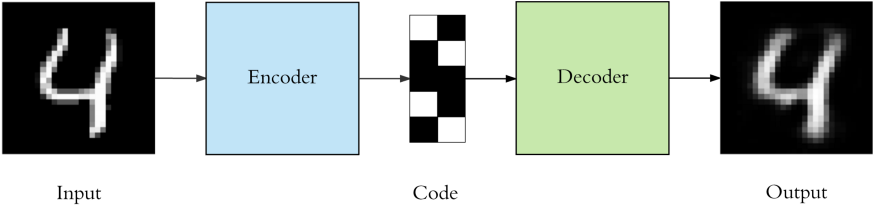
   So in simple terms we provide an input to the autoencoder and it tries to re-create it



In [89]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [90]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 1s 35ms/step - loss: 0.0571 - val_loss: 0.0554
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0545 - val_loss: 0.0526
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0515 - val_loss: 0.0494
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0483 - val_loss: 0.0460
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0448 - val_loss: 0.0424
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0413 - val_loss: 0.0390
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0380 - val_loss: 0.0359
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0350 - val_loss: 0.0332
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0325 - val_loss: 0.0310
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0304 - val_loss: 0.0291
Epoch 11/20
5/5 [============

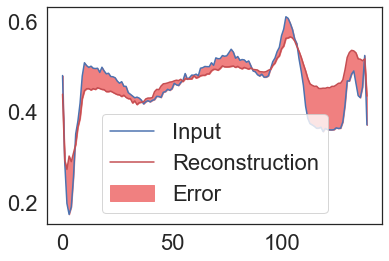

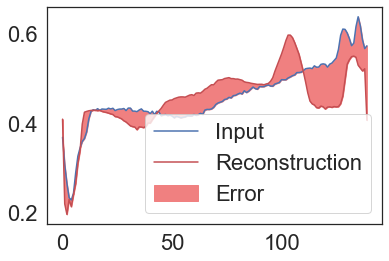

In [91]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

In [92]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)
print(t)

0.031498343


In [93]:
pred = prediction(autoencoder, n_test_data, t)
print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

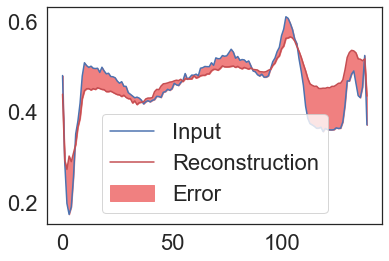

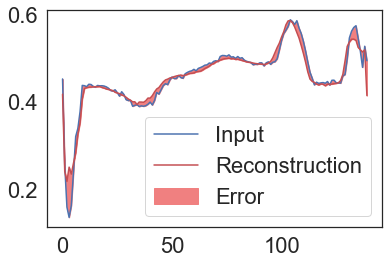

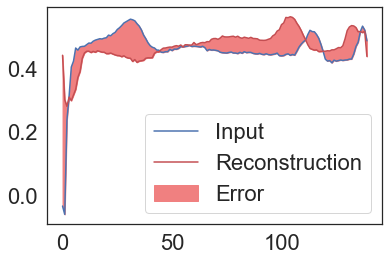

In [94]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)

# ECG Abnormality Prediction

# Read the Data using Pandas Library

In [95]:
data = pd.read_csv('ecg[1].csv')
data.head()

-0.11252183  -2.8272038  -3.7738969  -4.3497511  -4.376041  -3.4749863  \
0    -1.100878   -3.996840   -4.285843   -4.506579  -4.022377   -3.234368   
1    -0.567088   -2.593450   -3.874230   -4.584095  -4.187449   -3.151462   
2     0.490473   -1.914407   -3.616364   -4.318823  -4.268016   -3.881110   
3     0.800232   -0.874252   -2.384761   -3.973292  -4.338224   -3.802422   
4    -1.507674   -3.574550   -4.478011   -4.408275  -3.321242   -2.105171   

   -2.1814082  -1.8182865  -1.2505219  -0.47749208  ...  0.79216787  \
0   -1.566126   -0.992258   -0.754680     0.042321  ...    0.538356   
1   -1.742940   -1.490659   -1.183580    -0.394229  ...    0.886073   
2   -2.993280   -1.671131   -1.333884    -0.965629  ...    0.350816   
3   -2.534510   -1.783423   -1.594450    -0.753199  ...    1.148884   
4   -1.481048   -1.301362   -0.498240    -0.286928  ...    1.089068   

   0.93354122  0.79695779  0.57862066  0.2577399  0.22807718  0.12343082  \
0    0.656881    0.787490    0.724046   0.555784    0.476333    0.773820   
1    0.531452    0.311377   -0.021919  -0.713683   -0.532197    0.321097   
2    0.499111    0.600345    0.842069   0.952074    0.990133    1.086798   
3    0.958434    1.059025    1.371682   1.277392    0.960304    0.971020   
4    0.983369    1.014124    0.952629   0.749326    1.007076    1.634990   

   0.92528624  0.19313742  1.0  
0    1.119621   -1.436250  1.0  
1    0.904227   -0.421797  1.0  
2    1.403011   -0.383564  1.0  
3    1.614392    1.421456  1.0  
4    1.493365   -0.783134  1.0  

[5 rows x 141 columns]

# Separating Feature and Target Variables from Data

In [96]:
X = data.iloc[:,0:-1].values
X.shape

(4997, 140)

In [97]:
y = data.iloc[:,-1:].values
y.shape

(4997, 1)

# Plot Function for Visualization

In [98]:
def plot(X,y,pred,num_plots) :
    l = np.random.randint(0,X.shape[0],size=(num_plots//2,2))
    fig,axs = plt.subplots(num_plots//2,2,figsize=(20,20))

    for i in range(num_plots//2) :
        for j in range(2) :
            axs[i,j].plot(X[l[i,j]])
            if y[l[i,j]][0] == 0 :
                label0 = 'Abnormal'
            else :
                label0 = 'Normal'
            if np.round(pred[l[i,j]][0]) == 0 :
                label1 = 'Abnormal'
            else :
                label1 = 'Normal'
            text = 'Predicted : ' + label1 + '                                           Actual : ' + label0
            axs[i,j].set_title(text)

# Plotting random Features and its Variables

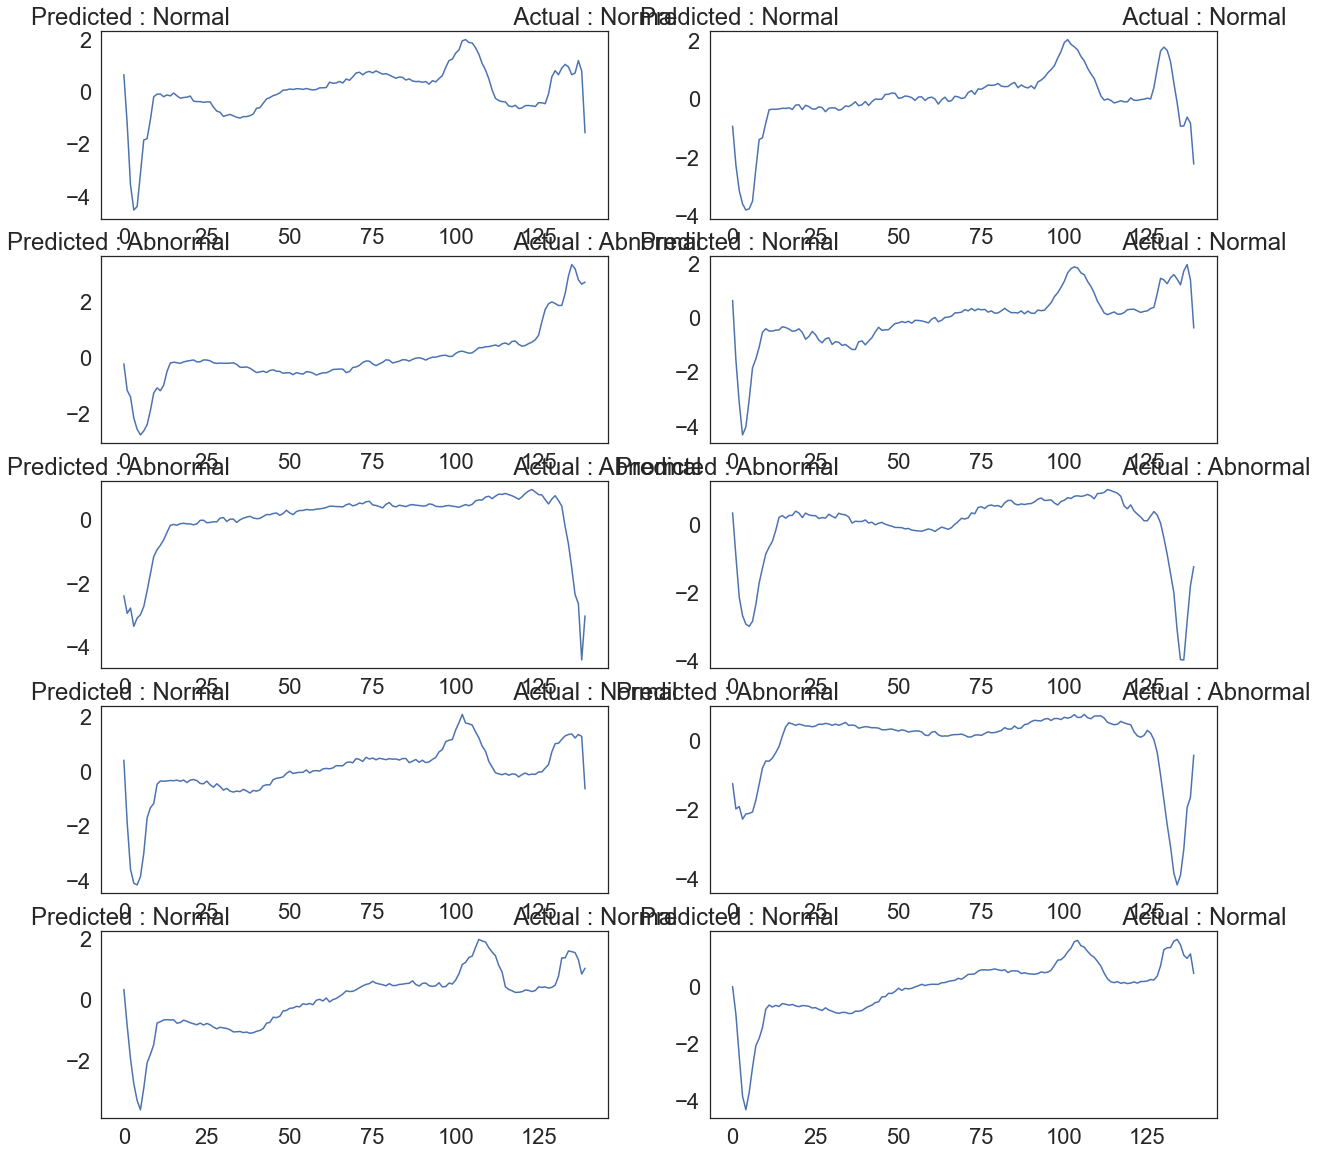

In [99]:
plot (X, y, y, 10)

# Splitting the Data into Train and Test Sets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

# Function to initialize and compile the ECG Model

In [101]:
def ECG_Model() :
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(140,)),
        tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis=-1)),
        tf.keras.layers.LSTM(64,return_sequences=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),loss='binary_crossentropy',metrics=['accuracy'])
    return model

# Loading the Model

In [102]:
ECG = ECG_Model()
ECG.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 140, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 140, 64)           16896     
                                                                 
 flatten (Flatten)           (None, 8960)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1147008   
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,164,033
Trainable params: 1,164,033
Non-trainable params: 0
_________________________________________________________________


# Fitting the ECG Model to Training Set

In [103]:
ECG.fit(X_train,y_train,epochs=100,validation_split=0.15,shuffle=True,batch_size=16)

Epoch 1/100
213/213 [==============================] - 17s 70ms/step - loss: 0.3316 - accuracy: 0.9341 - val_loss: 0.1640 - val_accuracy: 0.9600
Epoch 2/100
213/213 [==============================] - 14s 68ms/step - loss: 0.1274 - accuracy: 0.9682 - val_loss: 0.0943 - val_accuracy: 0.9767
Epoch 3/100
213/213 [==============================] - 14s 68ms/step - loss: 0.0885 - accuracy: 0.9738 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 4/100
213/213 [==============================] - 15s 68ms/step - loss: 0.0732 - accuracy: 0.9762 - val_loss: 0.0626 - val_accuracy: 0.9850
Epoch 5/100
213/213 [==============================] - 15s 68ms/step - loss: 0.0654 - accuracy: 0.9812 - val_loss: 0.0528 - val_accuracy: 0.9867
Epoch 6/100
213/213 [==============================] - 15s 69ms/step - loss: 0.0596 - accuracy: 0.9829 - val_loss: 0.0474 - val_accuracy: 0.9883
Epoch 7/100
213/213 [==============================] - 16s 74ms/step - loss: 0.0555 - accuracy: 0.9841 - val_loss: 0.0433 - val_ac

# Evaluating the ECG Model on Test Set

In [104]:
ECG.evaluate(X_test,y_test)

32/32 [==============================] - 1s 22ms/step - loss: 0.0254 - accuracy: 0.9950


[0.025419030338525772, 0.9950000047683716]

# Visualization of Prediction on Test Set

32/32 [==============================] - 1s 22ms/step


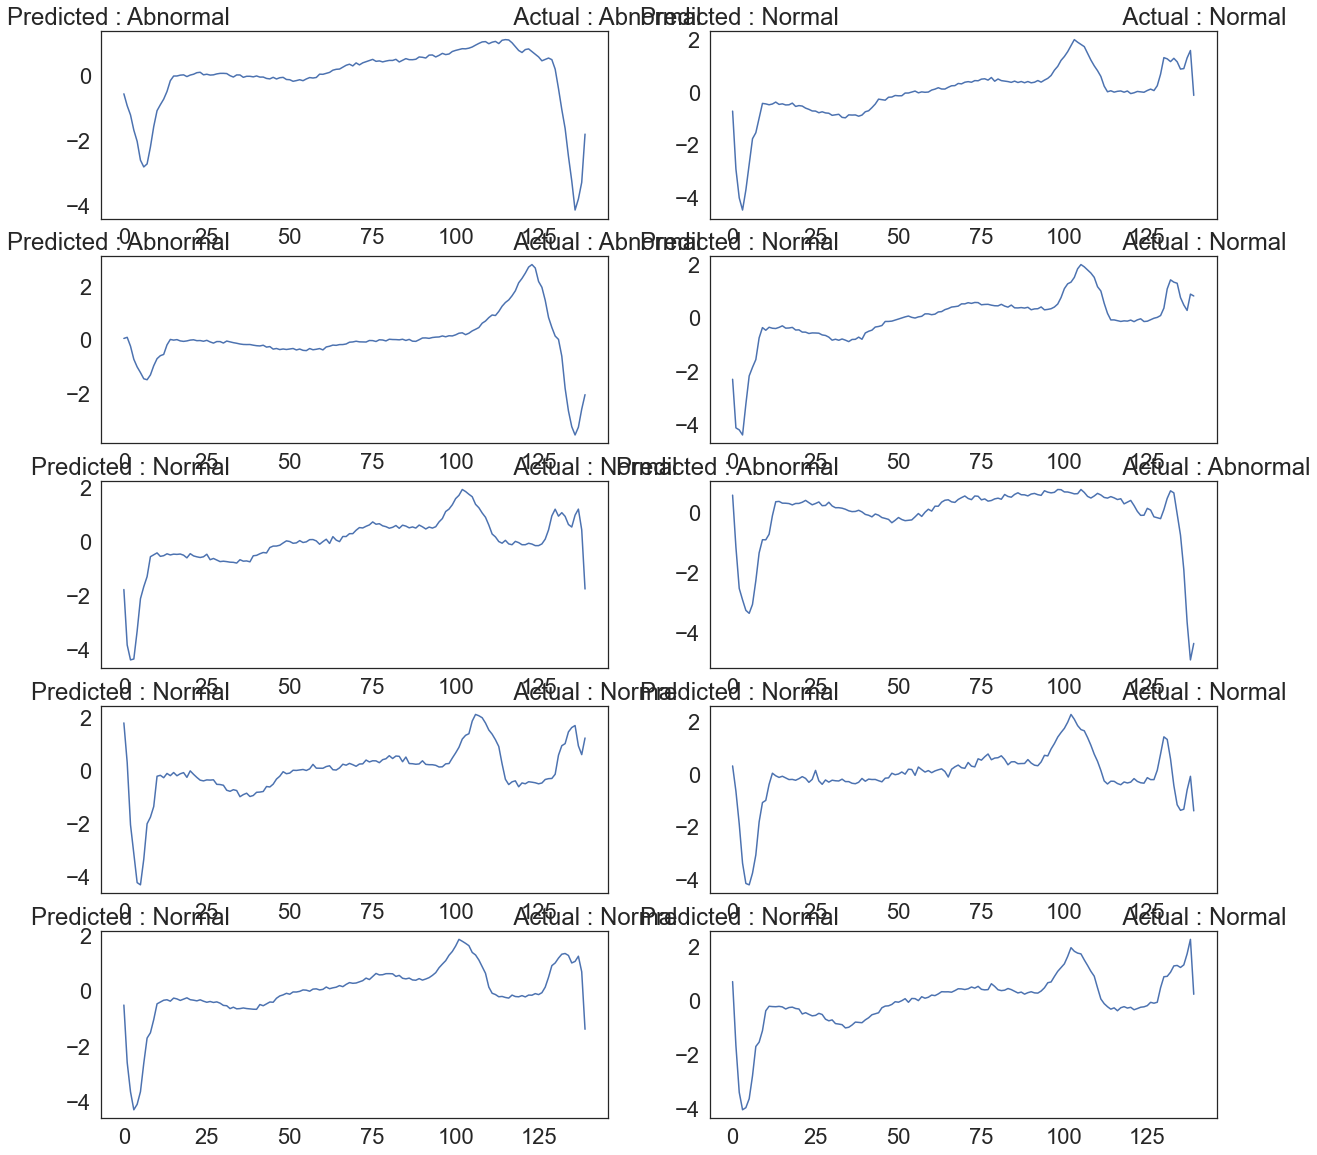

In [105]:
pred = ECG.predict(X_test)
plot(X_test,y_test,pred,10)

# The ECG Model has gained an accuracy of 99% (approx) on the Test Set after training it for 100 epochs

# P2, AutoEncoder for Anomaly Detection in ECG

In [106]:
plt.style.use('seaborn-whitegrid')

# Let's Read ECG data

In [107]:
df = pd.read_csv('ecg[1].csv', header=None)
df.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [108]:
#Now we will separate the data and labels so that it will be easy for us
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

# Statistical Summary of ECG Data

In [109]:
df.describe()

0            1            2            3            4    \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean     -0.262502    -1.649828    -2.492623    -3.119754    -3.167656   
std       1.152450     1.445542     1.386457     1.302921     1.104535   
min      -6.729499    -7.090374    -5.132459    -5.363241    -5.375715   
25%      -1.004220    -2.701936    -3.668585    -4.227337    -4.007630   
50%      -0.297541    -1.661892    -2.586129    -3.388210    -3.469899   
75%       0.499909    -0.677998    -1.514187    -2.235690    -2.531153   
max       4.966414     3.479689     2.660597     1.899798     2.147015   

               5            6            7            8            9    ...  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000  ...   
mean     -2.866306    -2.272845    -1.797754    -1.409784    -0.935806  ...   
std       0.906312     0.731594     0.622794     0.636863     0.657788  ...   
min      -5.330194    -4.782240    -4.311288    -4.071361    -4.142476  ...   
25%      -3.480666    -2.779832    -2.165808    -1.773870    -1.362003  ...   
50%      -2.947061    -2.285427    -1.750084    -1.422457    -0.910384  ...   
75%      -2.398797    -1.823480    -1.484107    -1.063592    -0.476477  ...   
max       1.614375     1.868728     1.804251     1.683730     1.898627  ...   

               131          132          133          134          135  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean      0.071312    -0.062622    -0.276086    -0.507750    -0.761323   
std       1.404425     1.646105     1.894515     2.059366     2.086130   
min      -4.167040    -4.557576    -4.530488    -4.563270    -5.150100   
25%      -1.087720    -1.588237    -2.146835    -2.730750    -3.031224   
50%       0.658318     0.717808     0.604747     0.334857    -0.030767   
75%       1.169392     1.238651     1.264379     1.234408     1.033957   
max       3.007606     2.854680     2.912394     2.937685     3.351437   

               136          137          138          139          140  
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000  
mean     -0.835173    -0.642739    -0.487667    -0.706574     0.584034  
std       2.056296     1.859409     1.831088     1.414414     0.492937  
min      -4.880460    -5.496107    -5.880890    -6.092227     0.000000  
25%      -2.868603    -2.154560    -1.658289    -1.596809     0.000000  
50%      -0.195151    -0.194423    -0.160262    -0.568443     1.000000  
75%       0.945027     0.951621     1.002628     0.271635     1.000000  
max       3.432519     3.579448     4.425976     7.402103     1.000000  

[8 rows x 141 columns]

In [110]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

# Let's apply main-max normalization to normalize data into range [0-1]**

In [111]:
# The data preparation is performed as follows:
# Step1: Compute the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Step2: apply the normalization formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#Step3: cast the data into type of float32
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)
#Step4: The value of label of each sample is 0 or 1, hence, we convert the label into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [112]:
#Step5: Divide the ECG data into normal and abnormal ones

#The normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#The Anomelous ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

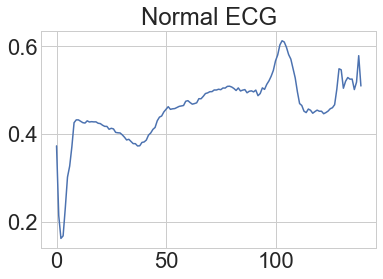

In [113]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[10])
plt.title('Normal ECG')
plt.show()


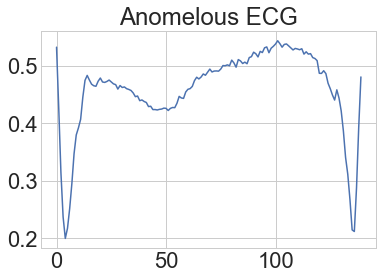

In [114]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[10])
plt.title('Anomelous ECG')
plt.show()

# Building a simle Autoencoder

In [115]:
class AnomalyAE(Model):
  def __init__(self):
    super(AnomalyAE, self).__init__()
    self.encoder = tf.keras.Sequential([layers.Dense(64, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(64, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [116]:
#Let's compile and train the model!!
autoencoder = AnomalyAE()
autoencoder.compile(optimizer='adam', loss='logcosh')
autoencoder.fit(n_train_data, n_train_data, epochs = 50, batch_size=256, validation_data=(n_test_data, n_test_data))
# fit() recieve the train data twice,because we are comparing the original ECG with the reconstructed one to calculate the reconstruction loss.
# AE are unsupervised learning models but here we use some supervision, thus it can be regarded as self-supervised.

Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 9.0317e-04 - val_loss: 7.1411e-04
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 6.6706e-04 - val_loss: 5.8150e-04
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 5.8073e-04 - val_loss: 5.5100e-04
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 5.6605e-04 - val_loss: 5.4107e-04
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 5.5616e-04 - val_loss: 5.3299e-04
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 5.50

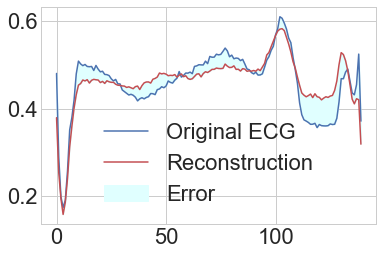

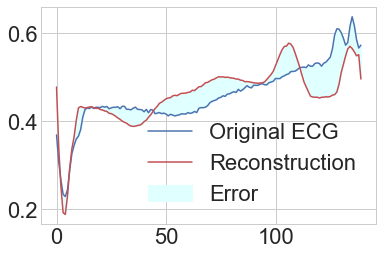

In [117]:
#Herein, we visualize original ECG against the reconstructed ones and also show the error
def Visulaize(data, n):
    latent_img = autoencoder.encoder(data)
    dec_img = autoencoder.decoder(latent_img)
    plt.plot(data[n], 'b')
    plt.plot(dec_img[n], 'r')
    plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcyan')
    plt.legend(labels=['Original ECG', 'Reconstruction', 'Error'])
    plt.show()

Visulaize(n_test_data, 0)
Visulaize(an_test_data, 0)

# Decide the ECG as an anomalous based on certain threshold

In [118]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
th = np.mean(train_loss) + np.std(train_loss)
print (th)

0.022890868


In [119]:
def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)

In [120]:
pred = prediction(autoencoder, n_test_data, th)
for x in pred[:30]:
    print("Normal" if x else "Anomalous")

Anomalous
Normal
Normal
Anomalous
Normal
Normal
Normal
Anomalous
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Anomalous
Normal
Normal
Normal
Anomalous
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal


In [121]:
pred = prediction(autoencoder, an_test_data, th)
for x in pred[:30]:
    print("Normal" if x else "Anomalous")

Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Normal
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous
Anomalous


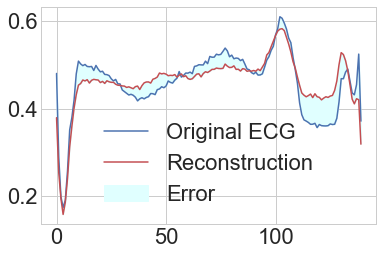

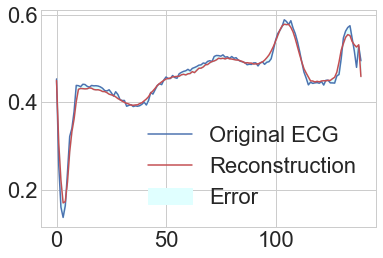

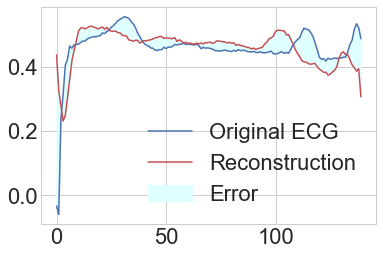

In [122]:
#Lets see some more result visually !!
Visulaize(n_test_data, 0)
Visulaize(n_test_data, 1)
Visulaize(n_test_data, 3)

# Anomaly detection by using encoding-decoding

In [123]:
dataframe = pd.read_csv('ecg[1].csv',header=None )
raw_data = dataframe.values
dataframe.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [124]:
print(dataframe.shape)
print("------------")
print(dataframe[140].value_counts())

(4998, 141)
------------
1.0    2919
0.0    2079
Name: 140, dtype: int64


In [125]:
labels = raw_data[:,-1]
data = raw_data[:,:-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,stratify=labels)

min_val = X_train.min(axis=0)
max_val = X_train.max(axis=0)

X_train = (X_train-min_val) / (max_val-min_val)
X_test = (X_test-min_val) / (max_val- min_val)

X_train_normal = X_train[y_train==1]
X_test_normal = X_test[y_test==1]

X_train_anomaly = X_train[y_train==0]
X_test_anomaly = X_test[y_test==0]

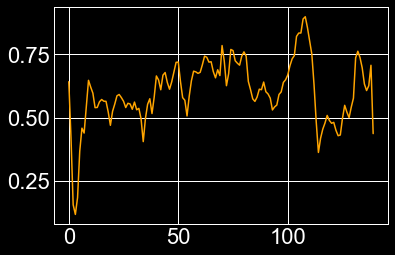

In [126]:
plt.style.use('dark_background')
plt.plot(X_train_normal[1],"-",color="orange")

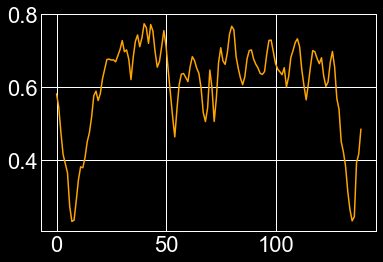

In [127]:
plt.style.use('dark_background')
plt.plot(X_train_anomaly[1],"-",color="orange")

In [132]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(32,activation='relu'))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(128,activation='relu'))
mdl.add(layers.Dense(X_train.shape[1],activation='sigmoid'))

mdl.compile(optimizer='adam',loss='mse')
mdl.fit(X_train_normal,X_train_normal, epochs=10,batch_size=10)

NameError: name 'keras' is not defined

In [131]:
X_pred = mdl.predict(X_train_normal)
train_mae = keras.metrics.mean_absolute_error(X_train_normal,X_pred).numpy()
train_mae

NameError: name 'mdl' is not defined

In [133]:
plt.hist(train_mae,color='orange')

NameError: name 'train_mae' is not defined

In [134]:
thr = train_mae.mean() + train_mae.std()
thr

NameError: name 'train_mae' is not defined

In [135]:
X_pred_test = mdl.predict(X_test)
test_mae = keras.metrics.mean_absolute_error(X_test,X_pred_test).numpy()
test_mae.shape

NameError: name 'mdl' is not defined

In [136]:
ypred = np.zeros(test_mae.shape)
ypred[test_mae < thr] =1

NameError: name 'test_mae' is not defined

In [137]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

print(accuracy_score(y_test,ypred))
print(recall_score(y_test,ypred))
print(roc_auc_score(y_test,ypred))

NameError: name 'ypred' is not defined

# ECG Classification

In [139]:
data=[]
with open('ecg[1].csv') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
data = np.array(data)
np.random.shuffle(data)

NameError: name 'csv' is not defined

In [140]:
splitIndex = int(len(data)*0.9)

value = data[ : , :-1].astype(float)
label = data[ : , -1].astype(float).astype(int)

TypeError: list indices must be integers or slices, not tuple

In [141]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((140, )),
    tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=-1)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 140, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 136, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 68, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)               

In [142]:
history = model.fit(
    value,
    label,
    epochs=20,
    validation_split=0.1,
    verbose=2,
)

NameError: name 'value' is not defined

In [143]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(len(history.history["accuracy"])), accuracy, '-')
plt.plot(range(len(history.history["val_accuracy"])), val_accuracy, '-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["accuracy","val_accuracy"])
plt.figure()

KeyError: 'accuracy'

In [2]:
abNormalhHeartData = pd.read_csv('ptbdb_abnormal.csv', header=None)
normalhHeartData = pd.read_csv('ptbdb_normal.csv', header=None)

print('Abnormal heart data information')
abNormalhHeartData.info()

print('Normal heart data information')
normalhHeartData.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [3]:
abNormalhHeartData.head()

0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 188 columns]

In [4]:
abNormalhHeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [5]:
 abNormalhHeartData.shape

(10506, 188)

In [6]:
normalhHeartData.head()

0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

Text(0.5, 1.0, 'STD for heart data')

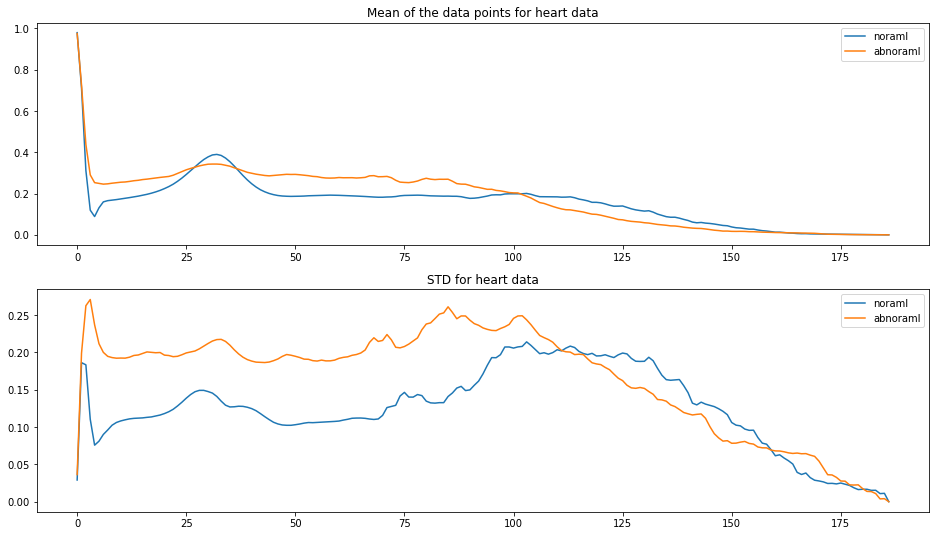

In [7]:
_, (ax1,ax2) = plt.subplots(2,1, figsize=(16,9))

ax1.plot(normalhHeartData.loc[:,:186].mean(), label='noraml')
ax1.plot(abNormalhHeartData.loc[:,:186].mean(), label='abnoraml')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()


ax2.plot(normalhHeartData.loc[:,:186].std(), label='noraml')
ax2.plot(abNormalhHeartData.loc[:,:186].std(), label='abnoraml')
ax2.legend()
ax2.set_title("STD for heart data")

In [8]:
all_heart_data = pd.concat([abNormalhHeartData, normalhHeartData], axis=0, ignore_index=True)
# all_heart_data = all_heart_data.sample(frac=1, random_state=0) # shuffle the data 
print(all_heart_data.info())
all_heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None


0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 188 columns]

In [9]:
all_heart_data.loc[:,187].value_counts()

1.0    10506
0.0     4046
Name: 187, dtype: int64

In [10]:
X = all_heart_data.loc[:,:186]
y = all_heart_data.loc[:,187]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [12]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
predicted_point = log_model.predict([X_test.iloc[0,:]])
print('Predict value using the LogisticRegression model: ', end='')
print(predicted_point)
print('The true value: ',end='')
print(y_test.iloc[0])

Predict value using the LogisticRegression model: [1.]
The true value: 0.0


In [14]:
print(f'The accuracy of the LogisticRegression model on train data = {log_model.score(X_train, y_train)*100:.3}%')

The accuracy of the LogisticRegression model on train data = 83.3%


In [15]:
print(f'The accuracy of the LogisticRegression model on test data = {log_model.score(X_test, y_test)*100:.3}%')

The accuracy of the LogisticRegression model on test data = 82.2%


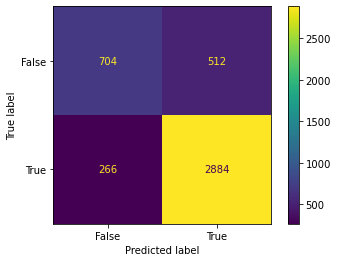

In [16]:
predicted = log_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [17]:
dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
predicted = dec_tree_model.predict([X_test.iloc[0,:]])
print('predict value using the DecisionTreeClassifier model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the DecisionTreeClassifier model: [0.]
The true value: 0.0


In [19]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_train,y_train)*100:.5}%')

The accuracy of the DecisionTreeClassifier model on train data = 100.0%


In [20]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_test,y_test)*100:.3}%')

The accuracy of the DecisionTreeClassifier model on train data = 92.1%


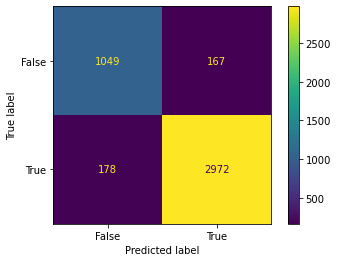

In [21]:
predicted = dec_tree_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [22]:
rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
predicted = rand_model.predict([X_test.iloc[0,:]])
print('predict value using the knn model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the knn model: [0.]
The true value: 0.0


In [24]:
print(f'The accuracy of the knn model on train data = {rand_model.score(X_train,y_train)*100:.5}%')

The accuracy of the knn model on train data = 100.0%


In [25]:
print(f'The accuracy of the knn model on test data = {rand_model.score(X_test,y_test)*100:.3}%')

The accuracy of the knn model on test data = 96.7%


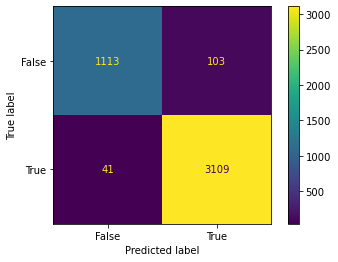

In [26]:
predicted = rand_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()